In [3]:

from analyze import analyze_data
from utils import RequestData
import json
v0_log_dir = "/mnt/network_drive/lrq/logs/logs_2025-06-25-21-41-28/run_0"
v1_log_dir = "/mnt/network_drive/lrq/logs/logs_2025-06-25-21-41-28/run_1"
memory_metric = "vllm:gpu_cache_usage_perc"
metrics_list = [memory_metric]
requests_list = []
for log_dir in [v0_log_dir, v1_log_dir]:
    report_file_path = analyze_data(log_dir, metrics_list)
    with open(report_file_path, 'r') as f:
        report = json.load(f)

    loadgen_data = report['loadgen_data']
    requests = []
    for request_data in loadgen_data:
        if 'error' not in request_data.keys():
            request = RequestData.init_from_dict(request_data)
            requests.append(request)
            continue
    requests_list.append(requests)

Starting Prometheus...


ts=2025-06-25T14:07:33.812Z caller=main.go:573 level=info msg="No time or size retention was set so using the default time retention" duration=15d
ts=2025-06-25T14:07:33.812Z caller=main.go:617 level=info msg="Starting Prometheus Server" mode=server version="(version=2.52.0, branch=HEAD, revision=879d80922a227c37df502e7315fad8ceb10a986d)"
ts=2025-06-25T14:07:33.812Z caller=main.go:622 level=info build_context="(go=go1.22.3, platform=linux/amd64, user=root@1b4f4c206e41, date=20240508-21:56:43, tags=netgo,builtinassets,stringlabels)"
ts=2025-06-25T14:07:33.812Z caller=main.go:623 level=info host_details="(Linux 5.4.0-216-generic #236-Ubuntu SMP Fri Apr 11 19:53:21 UTC 2025 x86_64 a6d92d3c79c0 (none))"
ts=2025-06-25T14:07:33.812Z caller=main.go:624 level=info fd_limits="(soft=1048576, hard=1048576)"
ts=2025-06-25T14:07:33.812Z caller=main.go:625 level=info vm_limits="(soft=unlimited, hard=unlimited)"
ts=2025-06-25T14:07:33.819Z caller=web.go:568 level=info component=web msg="Start listeni

Running Python app...
query_metrics_list: ['vllm:gpu_cache_usage_perc']
params_list: [{'query': 'vllm:gpu_cache_usage_perc', 'start': '2025-06-25T13:44:45Z', 'end': '2025-06-25T15:44:45Z', 'step': '1s'}]
Starting Prometheus...


ts=2025-06-25T14:07:45.280Z caller=main.go:573 level=info msg="No time or size retention was set so using the default time retention" duration=15d
ts=2025-06-25T14:07:45.280Z caller=main.go:617 level=info msg="Starting Prometheus Server" mode=server version="(version=2.52.0, branch=HEAD, revision=879d80922a227c37df502e7315fad8ceb10a986d)"
ts=2025-06-25T14:07:45.280Z caller=main.go:622 level=info build_context="(go=go1.22.3, platform=linux/amd64, user=root@1b4f4c206e41, date=20240508-21:56:43, tags=netgo,builtinassets,stringlabels)"
ts=2025-06-25T14:07:45.280Z caller=main.go:623 level=info host_details="(Linux 5.4.0-216-generic #236-Ubuntu SMP Fri Apr 11 19:53:21 UTC 2025 x86_64 86a7b89dd515 (none))"
ts=2025-06-25T14:07:45.280Z caller=main.go:624 level=info fd_limits="(soft=1048576, hard=1048576)"
ts=2025-06-25T14:07:45.281Z caller=main.go:625 level=info vm_limits="(soft=unlimited, hard=unlimited)"
ts=2025-06-25T14:07:45.287Z caller=web.go:568 level=info component=web msg="Start listeni

Running Python app...
query_metrics_list: ['vllm:gpu_cache_usage_perc']
params_list: [{'query': 'vllm:gpu_cache_usage_perc', 'start': '2025-06-25T13:45:29Z', 'end': '2025-06-25T15:45:29Z', 'step': '1s'}]


In [4]:

import numpy as np
import matplotlib.pyplot as plt
def plot_cdf(data, ax=None, label=None, **kwargs):
    """
    Plot the CDF of a 1D array on the given matplotlib Axes.

    Parameters:
    - data: array-like, the input values.
    - ax: matplotlib.axes.Axes, optional. If None, a new figure and axes will be created.
    - label: str, optional label for the CDF curve.
    - **kwargs: other keyword arguments passed to ax.plot()

    Returns:
    - ax: The matplotlib Axes object with the plot.
    """
    data = np.asarray(data)
    data_sorted = np.sort(data)
    cdf = np.linspace(0, 1, len(data_sorted), endpoint=False)

    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(data_sorted, cdf, label=label, **kwargs)
    ax.set_ylabel("CDF")
    ax.set_xlabel("Value")
    if label:
        ax.legend()

    return ax

In [5]:
v0_requests = requests_list[0]
v1_requests = requests_list[1]

v0_e2e_latencys = []
v0_ttft_latencys = []
v0_tpot_latencys = []

v1_e2e_latencys = []
v1_ttft_latencys = []
v1_tpot_latencys = []

for request in v0_requests:
    e2e = request.ttft + request.waiting_latency + request.decode_latency
    ttft = request.ttft
    tpot = request.decode_latency / request.decode_tokens
    v0_e2e_latencys.append(e2e)
    v0_ttft_latencys.append(ttft)
    v0_tpot_latencys.append(tpot)

for request in v1_requests:
    e2e = request.ttft + request.waiting_latency + request.decode_latency
    ttft = request.ttft
    tpot = request.decode_latency / request.decode_tokens
    v1_e2e_latencys.append(e2e)
    v1_ttft_latencys.append(ttft)
    v1_tpot_latencys.append(tpot)

max ttft for v0: 1.0132942199707031, max ttft for v0: 1.0505940914154053


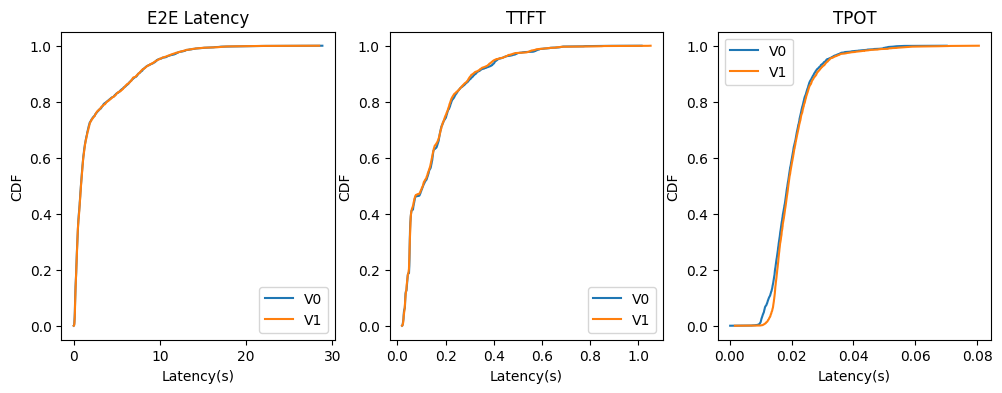

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
plot_cdf(v0_e2e_latencys, axes[0], label="V0")
plot_cdf(v1_e2e_latencys, axes[0], label="V1")
axes[0].set_title(f"E2E Latency")
axes[0].set_xlabel(f"Latency(s)")

plot_cdf(v0_ttft_latencys, axes[1], label="V0")
plot_cdf(v1_ttft_latencys, axes[1], label="V1")
axes[1].set_title(f"TTFT")
axes[1].set_xlabel(f"Latency(s)")

plot_cdf(v0_tpot_latencys, axes[2], label="V0")
plot_cdf(v1_tpot_latencys, axes[2], label="V1")
axes[2].set_title(f"TPOT")
axes[2].set_xlabel(f"Latency(s)")
print(f"max ttft for v0: {max(v0_ttft_latencys)}, max ttft for v0: {max(v1_ttft_latencys)}")
